In [15]:
import pandas as pd
import plotly.graph_objects as go
import json

In [16]:
df = pd.read_excel('..\Data\Extracted_data.xlsx', sheet_name ='Sheet1' )
df

,States,State Abbreviation,Y2006,Y2010,Y2014,Y2018
0,Uttarakhand,UK,178.0,227.0,340,442
1,Uttar Pradesh,UP,109.0,118.0,117,173
2,Bihar,BR,10.0,8.0,28,31
3,Andhra Pradesh (Including Telangana),APTS,95.0,72.0,68,74
4,Chattisgarh,CG,26.0,26.0,46,19
5,Madhya Pradesh,MP,300.0,257.0,308,526
6,Maharashtra,MH,103.0,169.0,190,312
7,Odisha,OD,45.0,32.0,28,28
8,Rajasthan,RJ,32.0,36.0,45,36
9,Jharkhand,JH,NaN,10.0,3,5


In [17]:
xval = df["State Abbreviation"]

In [18]:
y2006 = df["Y2006"]
y2006 = y2006.fillna(0)   # Replacing NaN with 0
y2006 = y2006.astype(int) # Converting all tiger count values to intergers

y2010 = df["Y2010"]
y2010 = y2010.fillna(0)
y2010 = y2010.astype(int)

y2014 = df["Y2014"]
y2014 = y2014.fillna(0)
y2014 = y2014.astype(int)

y2018 = df["Y2018"]
y2018 = y2018.fillna(0) 
y2018 = y2018.astype(int)

In [19]:
# Parameters for scaling the marker areas
add_val = 30 #20
div_val = 4

def scale_and_color_vec(yInput, add_val, div_val):
    
    # Creating the vector that provides the area size for the marker
    # add_val is a small value that is added so that zeros also have a small marker size
    # div_val is used so that the magnitudes of the markers are not too big
    
    yInputScale = yInput.add(add_val)
    yInputScale = yInputScale.truediv(div_val)
    
    # *** Creating the color vector where min and max have different colors and zeros have a different color ***
    # Getting the max and min values (min value greater than zero, so second lowest value) of the yInput vector
    
    yInputMax = yInput.max()
    yInputMin = yInput[yInput>0.1].min()
    
    yInputColor = []
    
    for i in range(len(yInput)):
        if yInput[i] == 0:
            yInputColor.append('Black')
        elif yInput[i] == yInputMin:
            yInputColor.append('#b2182b')
        elif yInput[i] == yInputMax:
            yInputColor.append('#2166ac') #rgb(93,62,153) 
        else:
            yInputColor.append('Orange')
            
    return yInputScale, yInputColor    


y2006scale, y2006color = scale_and_color_vec(y2006, add_val, div_val)
y2010scale, y2010color = scale_and_color_vec(y2010, add_val, div_val)
y2014scale, y2014color = scale_and_color_vec(y2014, add_val, div_val)
y2018scale, y2018color = scale_and_color_vec(y2018, add_val, div_val)

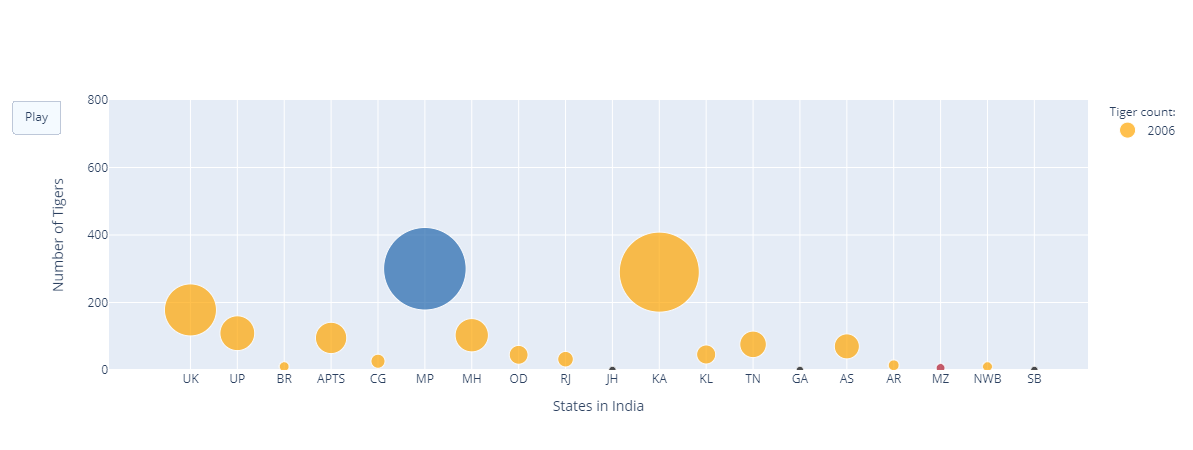

In [20]:
# Ref: https://plotly.com/python/animations/

fig1 = go.Figure(
    # data for first year: to show initial plot
    data = 
    [go.Scatter(
    x=xval,
    y=y2006,
    mode='markers',
    name="2006",
    marker=dict(size=y2006scale, color = y2006color) 
    )
    ],
    
    layout =     go.Layout(       
        yaxis=dict(range=[0, 800], autorange=False),
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None,{"frame": {"duration": 1000}}])])]
    ),
    
    # Add frames for the remaining years: also animates the first one again
    frames = [
        
    go.Frame(
    data=[go.Scatter(
    x=xval,
    y=y2006,
    mode='markers',
    name="2006",    
    marker=dict(size=y2006scale, color = y2006color))
        ]),
        
    go.Frame(
    data=[go.Scatter(
    x=xval,
    y=y2010,
    mode='markers',
    name="2010",
    #visible=False,
    marker=dict(size=y2010scale, color= y2010color))
        ]),
        
    go.Frame(
    data=[go.Scatter(
    x=xval,
    y=y2014,
    mode='markers',
    name="2014",
    #visible=False,
    marker=dict(size=y2014scale, color=y2014color))
         ]), 
        
    go.Frame(
    data=[go.Scatter(
    x=xval,
    y=y2018,
    mode='markers',
    name="2018",
    #visible=False,
    marker=dict(size=y2018scale, color=y2018color))
         ]), 
    ]    
)

fig1.update_layout(legend_title_text='Tiger count:', showlegend=True)
fig1.update_xaxes(title_text='States in India')
fig1.update_yaxes(title_text='Number of Tigers')
fig1.show()

In [21]:
import plotly.io as pio
pio.write_html(fig1, file ='../HTMLs/idiom3.html', auto_open=False)